<a href="https://colab.research.google.com/github/mainguyen198/Portfolio_MaiNguyen/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure Prediction**

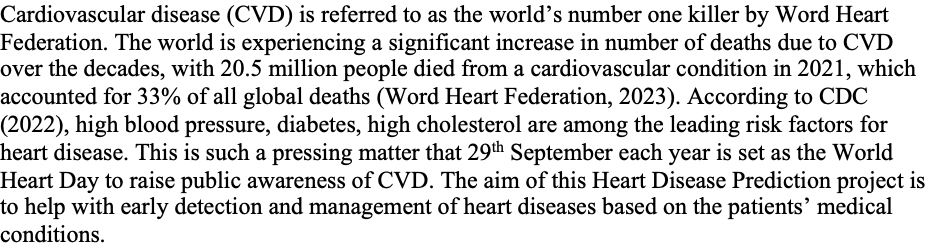

## **The Dataset**

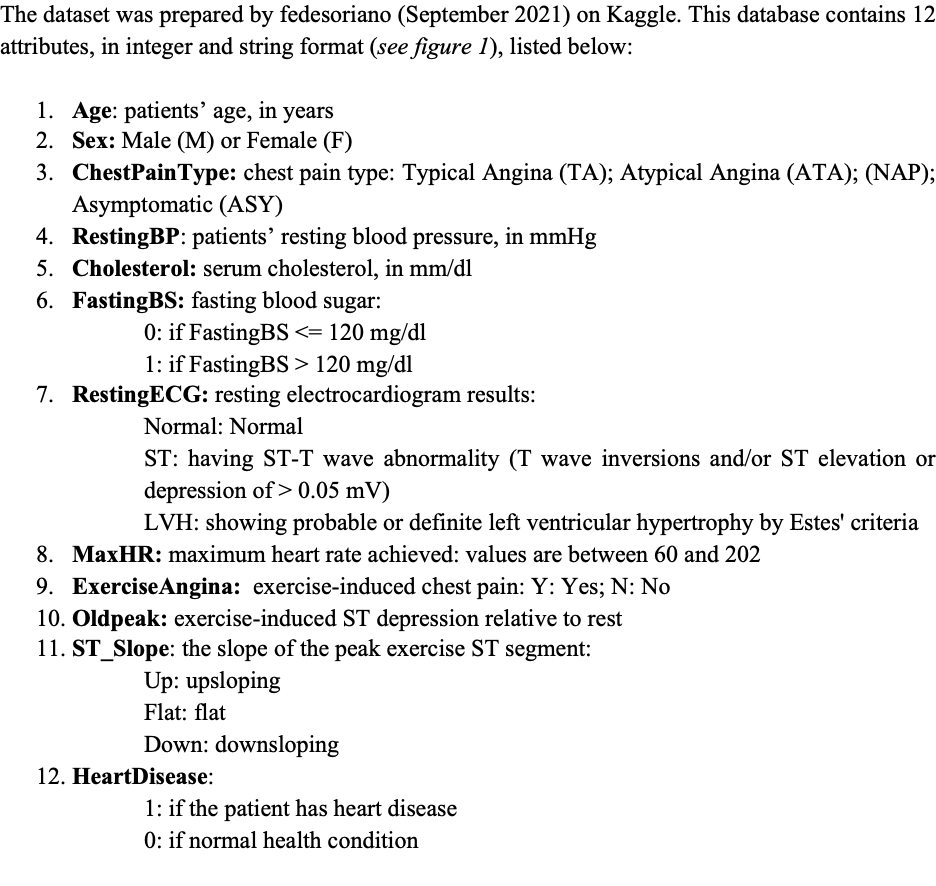

**Importing the dataset**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/heart2021.csv')
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

**Exploratory Data Analysis**

In [ ]:
# Check if there's any missing values:
df.isna().sum().sort_values()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Looking for duplicates:
df.duplicated().sum()

0

1    508
0    410
Name: HeartDisease, dtype: int64


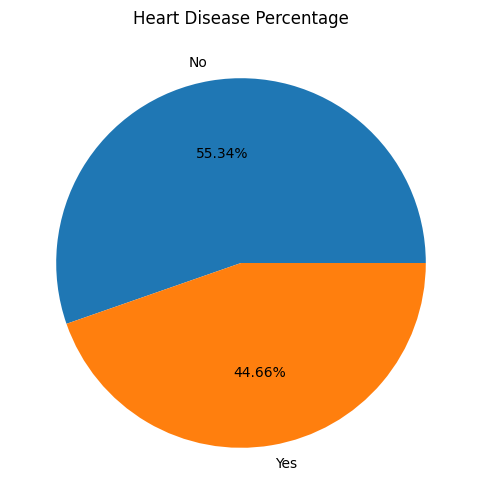

In [ ]:
# Heart Disease percentage
print(df['HeartDisease'].value_counts())
plt.figure(figsize=(10,6))
plt.pie(df['HeartDisease'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('Heart Disease Percentage')
plt.show()

M    725
F    193
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Gender and Heart Disease')

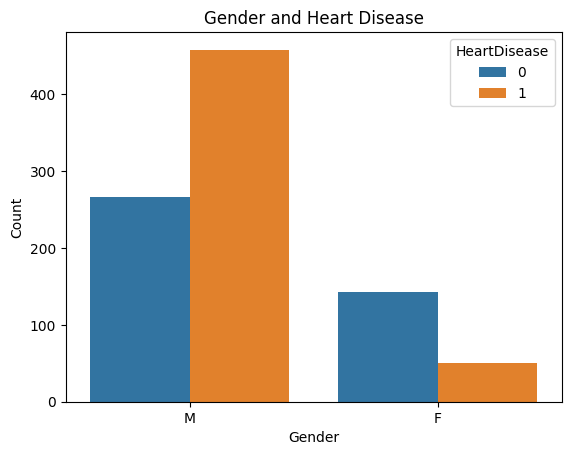

In [ ]:
# Gender and Heart Disease
print(df['Sex'].value_counts())

g=sns.countplot(data=df, x='Sex', hue='HeartDisease')
g.set(xlabel='Gender',
      ylabel='Count')
g.set_title("Gender and Heart Disease")

Text(0.5, 1.0, 'Age and Heart Disease')

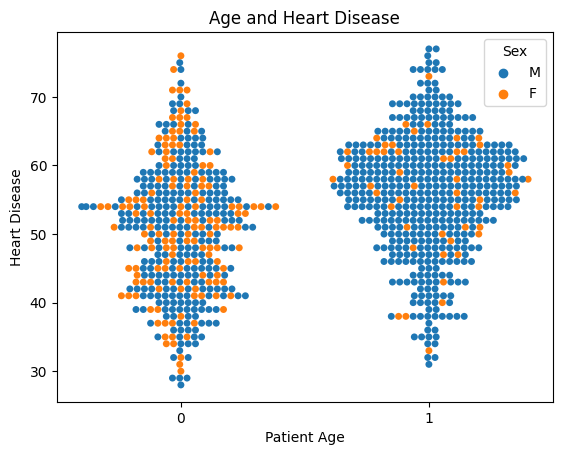

In [ ]:
# Age distribution and Heart Disease
g=sns.swarmplot(x='HeartDisease', y='Age', hue='Sex', data=df)
g.set(xlabel='Patient Age',
      ylabel='Heart Disease')
g.set_title("Age and Heart Disease")

Text(0.5, 1.0, 'Chest Pain and Heart Disease')

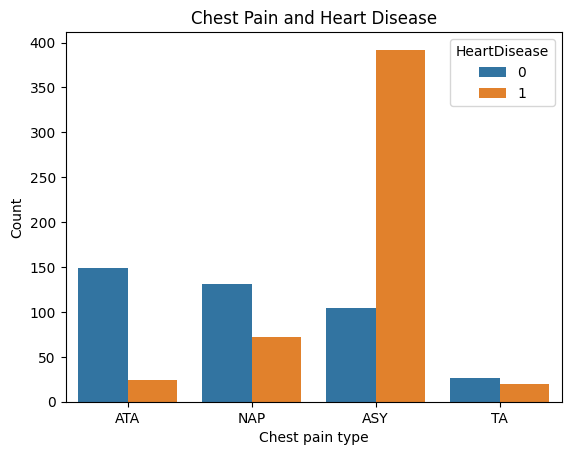

In [ ]:
# Chest pain type and Heart disease:
g=sns.countplot(x='ChestPainType', hue= 'HeartDisease',data=df)
g.set(xlabel='Chest pain type',
      ylabel='Count')
g.set_title("Chest Pain and Heart Disease")

Text(0.5, 1.0, 'Resting ECG and Heart Disease')

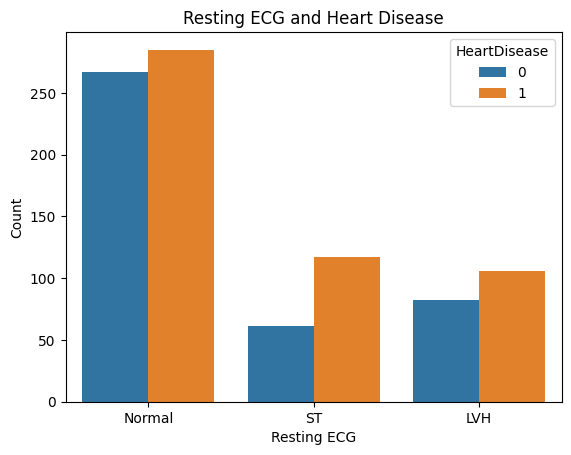

In [ ]:
# Fasting Blood Sugar and Heart Disease
g=sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
g.set(xlabel='Resting ECG',
      ylabel='Count')
g.set_title("Resting ECG and Heart Disease")

N    547
Y    371
Name: ExerciseAngina, dtype: int64


Text(0.5, 1.0, 'Exercise-induced Angina and Heart Disease')

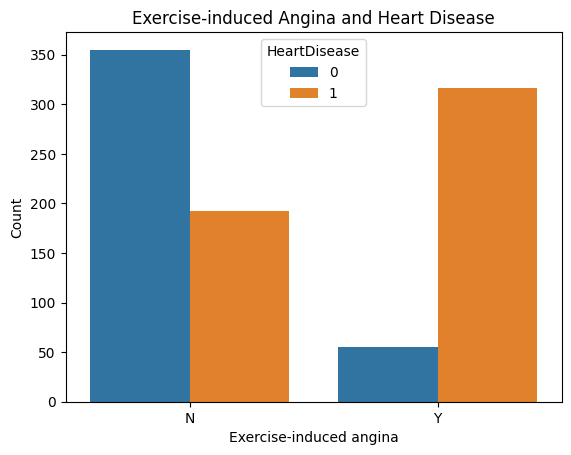

In [ ]:
# Exercise Angina and Heart Disease
print(df['ExerciseAngina'].value_counts())

g=sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)
g.set(xlabel='Exercise-induced angina',
      ylabel='Count')
g.set_title("Exercise-induced Angina and Heart Disease")

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


Text(0.5, 1.0, 'ST Slope and Heart Disease')

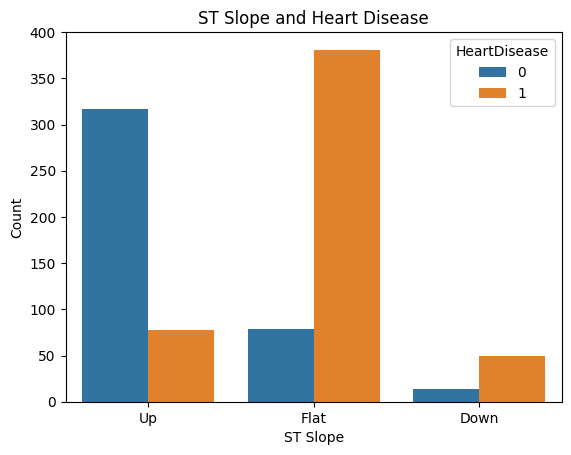

In [ ]:
# ST Slope and Heart Disease
# Exercise Angina and Heart Disease
print(df['ST_Slope'].value_counts())

g=sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
g.set(xlabel='ST Slope',
      ylabel='Count')
g.set_title("ST Slope and Heart Disease")

<ipython-input-50-474cf5b3afa0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'RestingBP'),
  Text(2.5, 0, 'Cholesterol'),
  Text(3.5, 0, 'FastingBS'),
  Text(4.5, 0, 'MaxHR'),
  Text(5.5, 0, 'Oldpeak'),
  Text(6.5, 0, 'HeartDisease')])

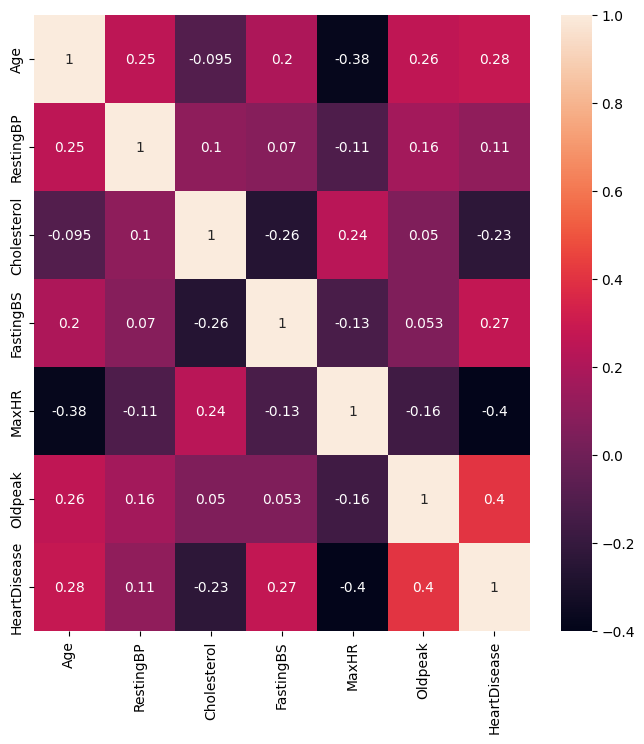

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)

**Preprocessing the dataset:** Convert categorical variables into dummies

In [ ]:
# get dummies for categorical variables: drop_first=True because the model is linear regression which is sensitive to multicollinearity issue
dataset = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

## Machine Learning Models

Since this is a Classification problem, I'm using Logistic Regression and KNeighborsClassifier as the models for machine learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = dataset.drop(['HeartDisease'], axis = 1).values
y = dataset['HeartDisease'].values

print(X.shape, y.shape)

(918, 15) (918,)


In [ ]:
# split and scale the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
reg = LogisticRegression(solver='lbfgs', max_iter=3000)

**Hyperparameter Tuning for Logistic Regression model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C': np.linspace(0.001, 1, 10)}


In [ ]:
reg_cv = GridSearchCV(reg, param_grid, cv=kf)
reg_cv.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])})

In [ ]:
print(reg_cv.best_params_, reg_cv.best_score_)

{'C': 0.445} 0.8528934861615879


In [ ]:
y_reg_pred = reg_cv.predict(X_test)

In [ ]:
# Accuracy score on the Test data:
print(reg_cv.score(X_test, y_test))

0.8804347826086957


In [ ]:
# Confusion matrix:
print(confusion_matrix(y_test, y_reg_pred))
print(classification_report(y_test, y_reg_pred))

[[67 15]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



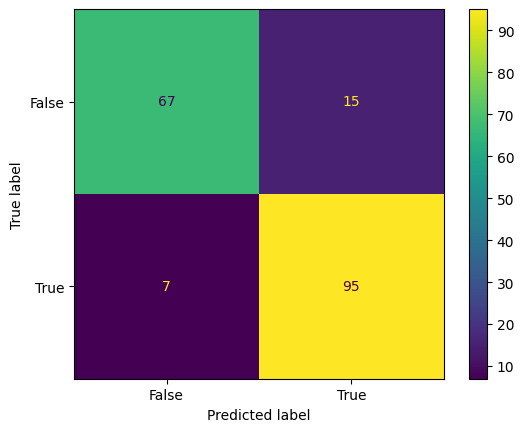

In [ ]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_reg_pred), display_labels=[False,True])
cm_display.plot()

Accuracy score is 88%.

The model produces 95 true positives and 15 false positive, meaning precision is 86%, which is also confirmed in the classification report. For the zero class, the model produces 67 true negatives, 7 false negatives, presicion is 91%. We want the number of false negatives as low as possible because it's dangerous for a patient with heart disease being diagnosed as healthy, which will delay the treatment and could lead to fatal consequences.

High recall for 1-class meaning lower false negative rate. In this case, it is 93%. We want this as high as possible. Let's examine this rate in the KNN model in the next section.

**Hyperparameter Tuning for KNN model:**

In [ ]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid=param_knn)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 24} 0.7165781381045568


Using the Logreg with C = 0.112 gives score of performance of 0.84 while with KNN model with n_neighbors = 1 gives a better performance of 0.96.

In [ ]:
# Accuracy score on the Test data:
y_knn_pred=knn_cv.predict(X_test)
print(accuracy_score(y_knn_pred, y_test))

0.7282608695652174


In [ ]:
# Confusion matrix:
print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

[[59 23]
 [27 75]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        82
           1       0.77      0.74      0.75       102

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



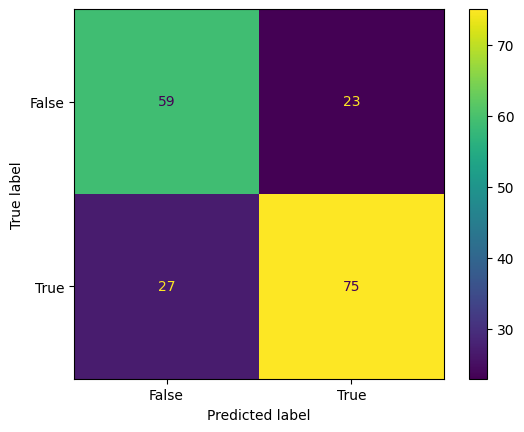

In [ ]:
# Visualising confusion matrix:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_knn_pred), display_labels=[False,True])
cm_display.plot()

The model produces 75 true positives and 23 false positive, meaning precision is 77%, which is also confirmed in the classification report. For zero class, the model produces 59 true negatives, 27 false negatives, precision is 69%.

Recall rate for 1-class is 74% which is also a lower rate than the Logistic Regression model.

The Confusion Matrix and Classification Report suggests that Logistic Regression model performs better than KNN model for this dataset.

**Making a Predictive System: If the data is given, it will predict if the person can have heart disease or not.**



In [ ]:
X_new = X_test[120].reshape(1,15)
prediction = reg_cv.predict(X_new)
print(prediction)

if(prediction[0] ==0):
  print('the object does not have heart disease')
else:
  print('the object has heart disease')

# Double check with the value in the HeartDisease column of the same index
print(y_test[120])

[0]
the object does not have heart disease
0


# **Insights**

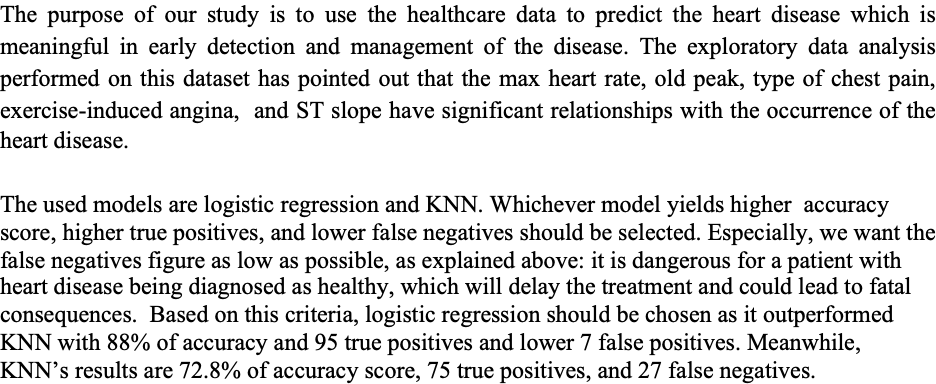